In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
df=pd.read_csv("bc.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [13]:
df["diagnosis"]=df["diagnosis"].map({"M":1, "B":0})
df=df.drop(["id", "Unnamed: 32"], axis=1)
print(df.head())

KeyError: "['id', 'Unnamed: 32'] not found in axis"

In [10]:
X=df.drop("diagnosis", axis=1)
y=df["diagnosis"]

In [11]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred=model.predict(X_test)

In [16]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0, 0.5, 'Accuracy')

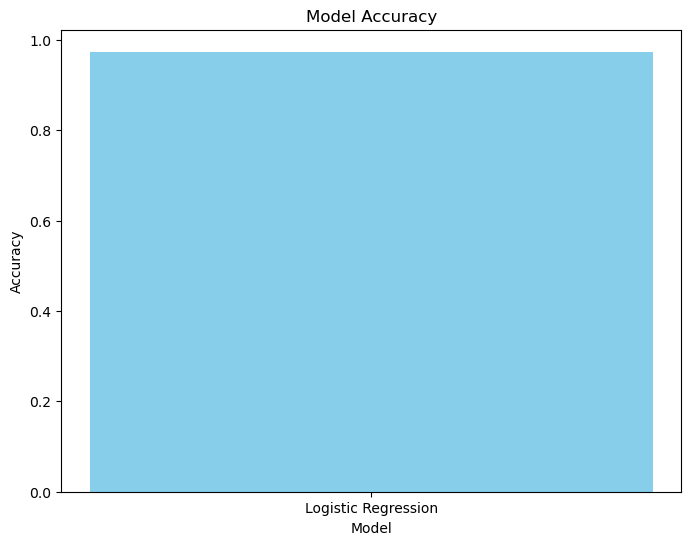

In [18]:
plt.figure(figsize=(8,6))
plt.bar(["Logistic Regression"], [accuracy], color="skyblue")
plt.ylim=(0,1)
plt.title("Model Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")